# Solution comparison

In [58]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

- **edd:** earliest due date
- **ml:** maximum lateness first
- **pd:** processing time - due date (sort comparator)

In [59]:
edd = pd.read_csv("../results/edd.csv", sep=";", escapechar="\\")
ml = pd.read_csv("../results/ml.csv", sep=";", escapechar="\\")
prd = pd.read_csv("../results/prd.csv", sep=";", escapechar="\\")

## Comparison function

In [60]:
def compare(first, second, name_first='First', name_second='Second'):
    print(f"Comparing {name_first} and {name_second} algorithms.")
    print()

    initial_equivalent = first.sort_values(
        by='File')['Initial Lateness'] == second.sort_values(by='File')['Initial Lateness']
    initial_equivalent.name = 'Both algorithms have equivalent initial solutions?'

    print(initial_equivalent.value_counts())
    print()

    initial_first_better = first.sort_values(
        by='File')['Initial Lateness'] < second.sort_values(by='File')['Initial Lateness']
    initial_first_better.name = f"{name_first} gave a better initial solution?"
    print(initial_first_better.value_counts())
    print()

    final_equivalent = first.sort_values(
        by='File')['Final Lateness'] == second.sort_values(by='File')['Final Lateness']
    final_equivalent.name = "Both algorithms have equivalent final solutions?"
    print(final_equivalent.value_counts())
    print()

    final_first_better = first.sort_values(
        by='File')['Final Lateness'] < second.sort_values(by='File')['Final Lateness']
    final_first_better.name = f"{name_first} gave a better solution?"
    print(final_first_better.value_counts())

    equals = first.sort_values(by='File')[['Initial Lateness', 'Final Lateness']] == second.sort_values(
        by='File')[['Initial Lateness', 'Final Lateness']]
    cm1 = equals.value_counts().unstack()

    betters = first.sort_values(by='File')[['Initial Lateness', 'Final Lateness']] < second.sort_values(
        by='File')[['Initial Lateness', 'Final Lateness']]
    cm2 = betters.value_counts().unstack()

    _, axes = plt.subplots(1, 2, figsize=(12, 5))

    sns.heatmap(cm1, annot=True, fmt="d", cmap="Blues", ax=axes[0])
    axes[0].set_title("Solutions are equal")
    axes[0].set_xlabel("Final Lateness Are Equal")
    axes[0].set_ylabel("Initial Lateness Are Equal")

    sns.heatmap(cm2, annot=True, fmt="d", cmap="Blues", ax=axes[1])
    axes[1].set_title(f"{name_first} is better")
    axes[1].set_xlabel("Final Lateness Is better")
    axes[1].set_ylabel("Initial Lateness Is better")

    plt.tight_layout()
    plt.show()

## Results

### EDD vs ML

Comparing EDD and ML algorithms.

Both algorithms have equivalent initial solutions?
False    96
True     48
Name: count, dtype: int64

EDD gave a better initial solution?
True     87
False    57
Name: count, dtype: int64

Both algorithms have equivalent final solutions?
True     76
False    68
Name: count, dtype: int64

EDD gave a better solution?
False    114
True      30
Name: count, dtype: int64


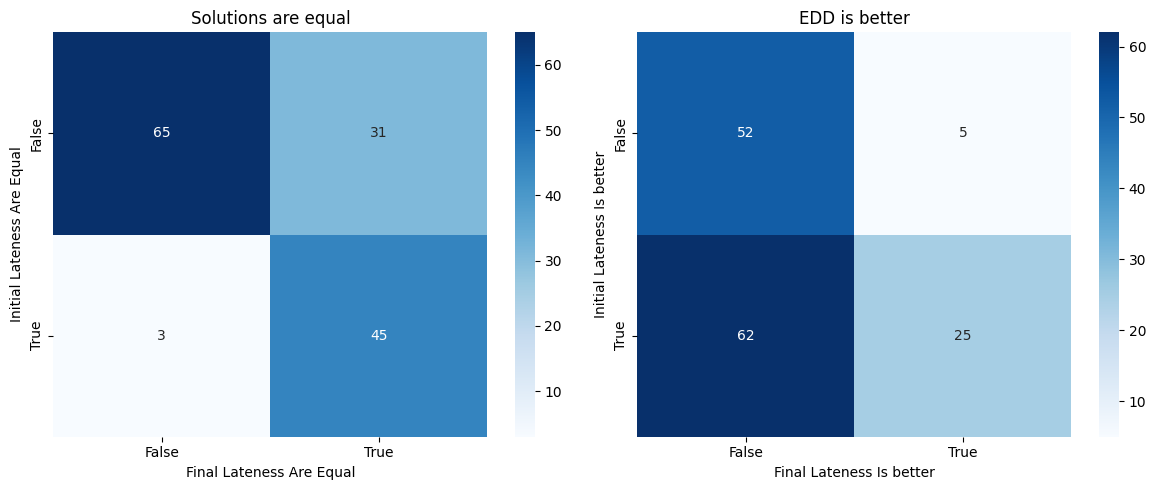

In [61]:
compare(edd, ml, "EDD", "ML")

### EDD vs PRD (Processing Time - Due Date)

Comparing EDD and PD algorithms.

Both algorithms have equivalent initial solutions?
False    93
True     51
Name: count, dtype: int64

EDD gave a better initial solution?
False    89
True     55
Name: count, dtype: int64

Both algorithms have equivalent final solutions?
True     88
False    56
Name: count, dtype: int64

EDD gave a better solution?
False    113
True      31
Name: count, dtype: int64


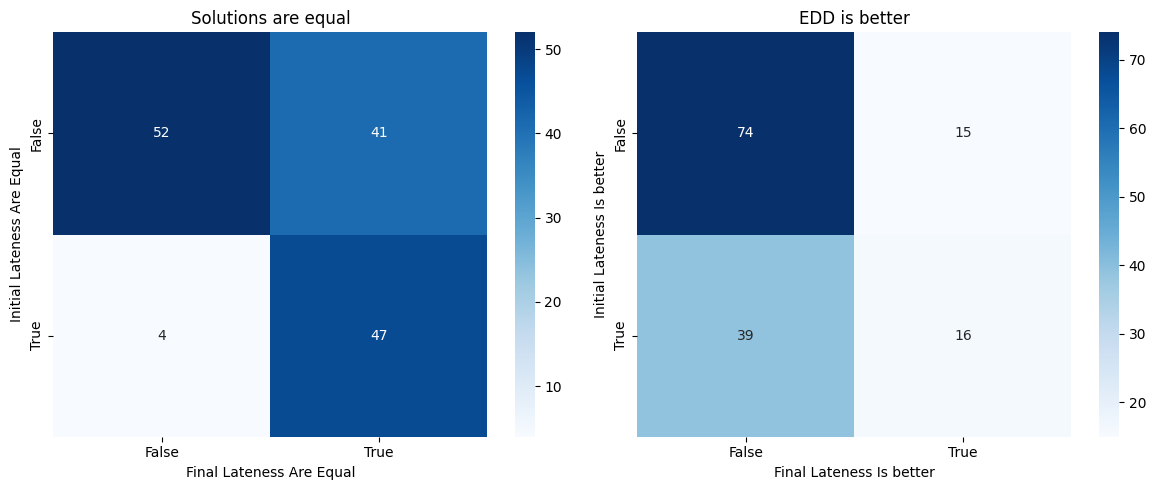

In [62]:
compare(edd, prd, "EDD", "PD")

### PRD vs ML

Comparing PRD and ML algorithms.

Both algorithms have equivalent initial solutions?
False    76
True     68
Name: count, dtype: int64

PRD gave a better initial solution?
True     73
False    71
Name: count, dtype: int64

Both algorithms have equivalent final solutions?
True     99
False    45
Name: count, dtype: int64

PRD gave a better solution?
False    128
True      16
Name: count, dtype: int64


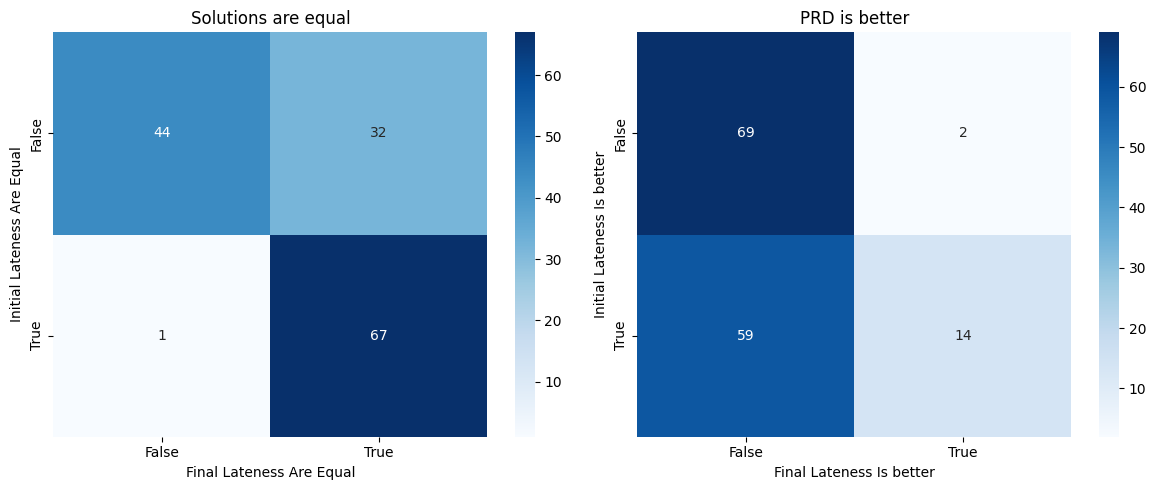

In [63]:
compare(prd, ml, "PRD", "ML")

## All Latenesses

In [64]:
all_lateness = pd.DataFrame({
    'Instance': edd['File'],
    'EDD': edd['Initial Lateness'], 
    'PRD': prd['Initial Lateness'],
    'ML': ml['Initial Lateness'],
    'EDD + Local Search': edd['Final Lateness'], 
    'PRD + Local Search': prd['Final Lateness'],
    'ML + Local Search': ml['Final Lateness'],
})
all_lateness

,Instance,EDD,PRD,ML,EDD + Local Search,PRD + Local Search,ML + Local Search
0,instances/100-2-0.5-L.txt,8812,8940,10011,7228,7492,7547
1,instances/100-2-0.5-M.txt,8685,9261,11277,7101,6957,6957
2,instances/100-2-0.5-S.txt,3580,3514,3652,3120,3212,3189
3,instances/100-2-1.5-L.txt,4610,4598,6134,2915,2915,3009
4,instances/100-2-1.5-M.txt,3744,3925,4273,3206,3090,3036
...,...,...,...,...,...,...,...
139,instances/80-5-2.5-M.txt,994,927,938,807,807,807
140,instances/80-5-2.5-S.txt,-17,-17,-17,-17,-17,-17
141,instances/80-5-3.5-L.txt,-248,-248,-248,-248,-248,-248
142,instances/80-5-3.5-M.txt,151,201,235,112,112,112
